In [22]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
from keras import regularizers
from keras import utils


In [23]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [24]:
X_train_total = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train_total = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [25]:
split_train = train_df[train_df['Participant_ID']<=460]
splt_val = train_df[train_df['Participant_ID']>460]

X_train = split_train.drop(["Participant_ID", "Depression"], axis=1)
y_train = split_train[["Participant_ID", "Depression", "Gender"]]

X_val = splt_val.drop(["Participant_ID", "Depression"], axis=1)
y_val = splt_val[["Participant_ID", "Depression", "Gender"]]

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled_val = scaler.transform(X_val)

In [27]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.L2(0.001)))
model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0005)))
# model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Adam(learning_rate=0.001),metrics=["accuracy"])
trained_model = model3.fit(X_scaled, np.array(y_train["Depression"]), 
                           epochs=25,batch_size=16, 
                           validation_data=(X_scaled_val, np.array(y_val["Depression"])),
                           class_weight = calculate_class_weights(y_train, "Depression"))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                2880      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                2880      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/25
703/703 [==============================] - 1s 547us/step - loss: 0.6736 - accuracy: 0.6670 - val_loss: 0.7259 - val_accuracy: 0.5684
Epoch 2/25
703/703 [==============================] - 0s 442us/step - loss: 0.5507 - accuracy: 0.7565 - val_loss: 0.7753 - val_accuracy: 0.5436
Epoch 3/25
703/703 [==============================] - 0s 509us/step - loss: 0.4714 - accuracy: 0.8027 - val_loss: 0.6667 - val_accuracy: 0.7031
Epoch 4/25
703/703 [==============================] - 0s 442us/step - loss: 0.4189 - accuracy: 0.8316 - val_loss: 0.6455 - val_accuracy: 0.7230
Epoch 5/25
703/703 [==============================] - 0s 448us/step - loss: 0.3845 - accuracy: 0.8497 - val_loss: 0.7522 - val_accuracy: 0.6595
Epoch 6/25
703/703 [==============================] - 0s 437us/step - loss: 0.3490 - accuracy: 0.8680 - val_loss: 0.6971 - val_accuracy: 0.6998
Epoch 7/25
703/703 [==============================] - 0s 438us/step - loss: 0.3347 - accuracy: 0.8773 - val_loss: 0.7932 - val_accuracy:

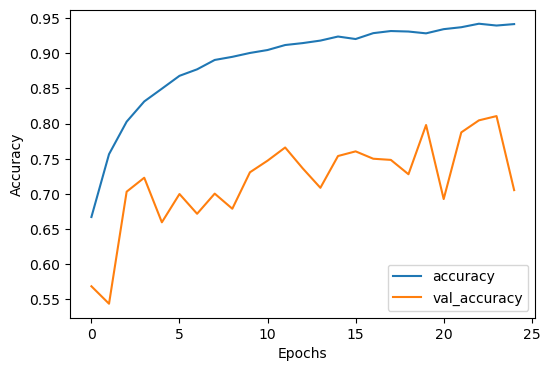

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(trained_model.history["accuracy"], label="accuracy")
plt.plot(trained_model.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Train on entire dataset and test it on test data

In [29]:
scaler = StandardScaler()
X_scaled_total = scaler.fit_transform(X_train_total)
X_scaled_test = scaler.transform(X_test)

In [30]:
utils.set_random_seed(3)
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_scaled.shape[1],),kernel_regularizer=regularizers.L2(0.0001)))
# model3.add(Dense(32, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(16, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
# model3.add(Dense(8, activation='relu',kernel_regularizer=regularizers.L2(0.0001)))
model3.add(Dense(1, activation="sigmoid"))
model3.summary()
model3.compile(loss="binary_crossentropy", optimizer = Nadam(learning_rate=0.001),metrics=["accuracy"])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                2880      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3553 (13.88 KB)
Trainable params: 3553 (13.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
trained_model = model3.fit(X_scaled_total, np.array(y_train_total["Depression"]), 
                           epochs=25,batch_size=16, 
                           class_weight = calculate_class_weights(y_train, "Depression"))

Epoch 1/25
816/816 [==============================] - 1s 429us/step - loss: 0.6457 - accuracy: 0.7187
Epoch 2/25
816/816 [==============================] - 0s 421us/step - loss: 0.5577 - accuracy: 0.7521
Epoch 3/25
816/816 [==============================] - 0s 489us/step - loss: 0.4879 - accuracy: 0.7848
Epoch 4/25
816/816 [==============================] - 0s 412us/step - loss: 0.4374 - accuracy: 0.8048
Epoch 5/25
816/816 [==============================] - 0s 435us/step - loss: 0.3998 - accuracy: 0.8245
Epoch 6/25
816/816 [==============================] - 0s 419us/step - loss: 0.3686 - accuracy: 0.8453
Epoch 7/25
816/816 [==============================] - 0s 501us/step - loss: 0.3406 - accuracy: 0.8579
Epoch 8/25
816/816 [==============================] - 0s 418us/step - loss: 0.3219 - accuracy: 0.8666
Epoch 9/25
816/816 [==============================] - 0s 410us/step - loss: 0.3044 - accuracy: 0.8706
Epoch 10/25
816/816 [==============================] - 0s 413us/step - loss: 0.285

In [32]:
y_pred = model3.predict(X_scaled_test)
y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)

97/97 [==============================] - 0s 465us/step


/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_35798/1096817474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = np.where(y_pred>=0.5,1,0)


In [33]:
y_test

,Participant_ID,Depression,Gender,Depression_predicted
0,474,0,1,0
1,474,0,1,0
2,474,0,1,0
3,474,0,1,0
4,474,0,1,0
...,...,...,...,...
3086,479,0,1,0
3087,479,0,1,1
3088,479,0,1,0
3089,479,0,1,0


Accuracy: 0.7
Balanced Accuracy: 0.5952380952380952
Equality of Opportunity: 0.19999999999999996


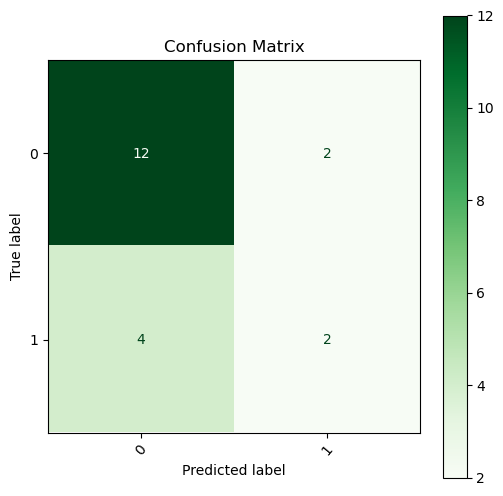

In [34]:
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)
print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")
show_conf_matrix(y_test)